### Podatkovno rudarjenje, 1. domača naloga, 15.3.2019

# Priprava podatkov, osnovne statistike in vizualizacija

Aljaž Debelak

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in prikaz
osnovnih statistik.

### Oddaja
Zapišite kodo in odgovore v spodnje celice. Tako pripravljen notebook shranite v vaš repozitorij za domače naloge na *github*. V učilnici oddajte le povezavo do notebooka v vašem repozitoriju, n.pr.: 
https://github.com/PR-ULFRI/dn19-1-vašeuporabniškoime/n1_priprava_pregled.ipynb.

Za bolj podrobna navodila, glejte razdelek "Domače naloge" v [spletni učilnici predmeta](https://ucilnica.fri.uni-lj.si/course/view.php?id=37).

## Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**. Podatki so v mapi `/podatki/ml-latest-small`.

Iste podatke boste uporabili v vseh domačih nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5.  
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

Zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov, ki jih boste uporabi pri odgovarjanju na spodnja vprašanja.

Kodo lahko razdelite v več celic.

In [1]:
import numpy as np
import operator
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime


movies_id = []
movies_title = {}
movies_genres = {}
movies_ratings = {}
movieId_time = {}
movies_cast = {}

with open('podatki/ml-latest-small/movies.csv',encoding="utf8") as file:
    file.readline()
    for line in file:
        genres = []
        if line.split(',')[-1] != "":
            genres = line.split(',')[-1].split("|")
            genres[-1] = genres[-1].replace("\n", "")
        
        movieId = int(line.split(',')[0])       
        movies_id.append(movieId)
        movies_title[movieId] = "".join(line.split(',')[1:-1]).replace('"','')
        movies_genres[movieId] = genres
        movies_ratings[movieId] = []
        movieId_time[movieId] = []

with open('podatki/ml-latest-small/ratings.csv',encoding="utf8") as file:
    file.readline()
    for line in file:
        movies_ratings[int(line.split(',')[1])].append(float(line.split(',')[2]))
        movieId_time[int(line.split(',')[1])].append([float(line.split(',')[2]),int(line.split(',')[3])])
        
with open('podatki/ml-latest-small/cast.csv',encoding="utf8") as file:
    file.readline()
    for line in file:
        movies_cast[int(line.split(',')[0])] = (line.split(',')[1].split('|'))
             

## Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite po 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

Kodo lahko razdelite v več celic.

In [2]:
Avg_ratings = {}
for movieId, ratings in movies_ratings.items():
    if len(ratings) == 0:
        continue
    Avg_ratings[movieId] = mean = np.mean(ratings)

sorted_ratings = sorted(Avg_ratings.items(), key=lambda kv: kv[1], reverse=True)

print("Najbolših 10:\n")
for i in range(10):
    print("{} : {}".format(movies_title[sorted_ratings[i][0]], sorted_ratings[i][1]))
    



#-------------------------------------------------------
#Nekateri filmi nimajo dosti ocen
#Popravimo lahko tako, da izpustimo filme, ki nimajo vsaj 10 ocen

Avg_ratings = {}
for movieId, ratings in movies_ratings.items():
    if len(ratings) < 10:
        continue
    mean = np.mean(ratings)
    Avg_ratings[movieId] = mean

sorted_ratings = sorted(Avg_ratings.items(), key=lambda kv: kv[1], reverse=True)

print("----------------------------------------------\n\n\nNajboljših 10, ki imajo vsaj 10 ocen:\n")
for i in range(10):
    print("{} : {}".format(movies_title[sorted_ratings[i][0]], sorted_ratings[i][1]))



Najbolših 10:

Lamerica (1994) : 5.0
Mute Witness (1994) : 5.0
Picture Bride (Bijo photo) (1994) : 5.0
Red Firecracker Green Firecracker (Pao Da Shuang Deng) (1994) : 5.0
Paris France (1993) : 5.0
Faces (1968) : 5.0
Maya Lin: A Strong Clear Vision (1994) : 5.0
Heavy (1995) : 5.0
Death in the Garden (Mort en ce jardin La) (1956) : 5.0
Day the Sun Turned Cold The (Tianguo niezi) (1994) : 5.0
----------------------------------------------


Najboljših 10, ki imajo vsaj 10 ocen:

Best Years of Our Lives The (1946) : 4.636363636363637
Inherit the Wind (1960) : 4.541666666666667
Godfather The (1972) : 4.4875
Shawshank Redemption The (1994) : 4.487138263665595
Tom Jones (1963) : 4.458333333333333
Gladiator (1992) : 4.454545454545454
On the Waterfront (1954) : 4.448275862068965
When We Were Kings (1996) : 4.4375
All About Eve (1950) : 4.434210526315789
Ran (1985) : 4.423076923076923


Odgovor: **zapišite odgovor**

### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

Kodo lahko razdelite v več celic.

In [3]:
numOfMovies = {}

for genres in movies_genres.values():
    for genre in genres:
        if genre not in numOfMovies:
            numOfMovies[genre] = 0
        numOfMovies[genre] += 1
        
print("Vseh žanrov je "+str(len(numOfMovies)-2)+", saj imax in 'no genres listed' nista žanra")

Vseh žanrov je 18, saj imax in 'no genres listed' nista žanra


Odgovor: Vseh žanrov je 18, saj imax in 'no genres listed' nista žanra

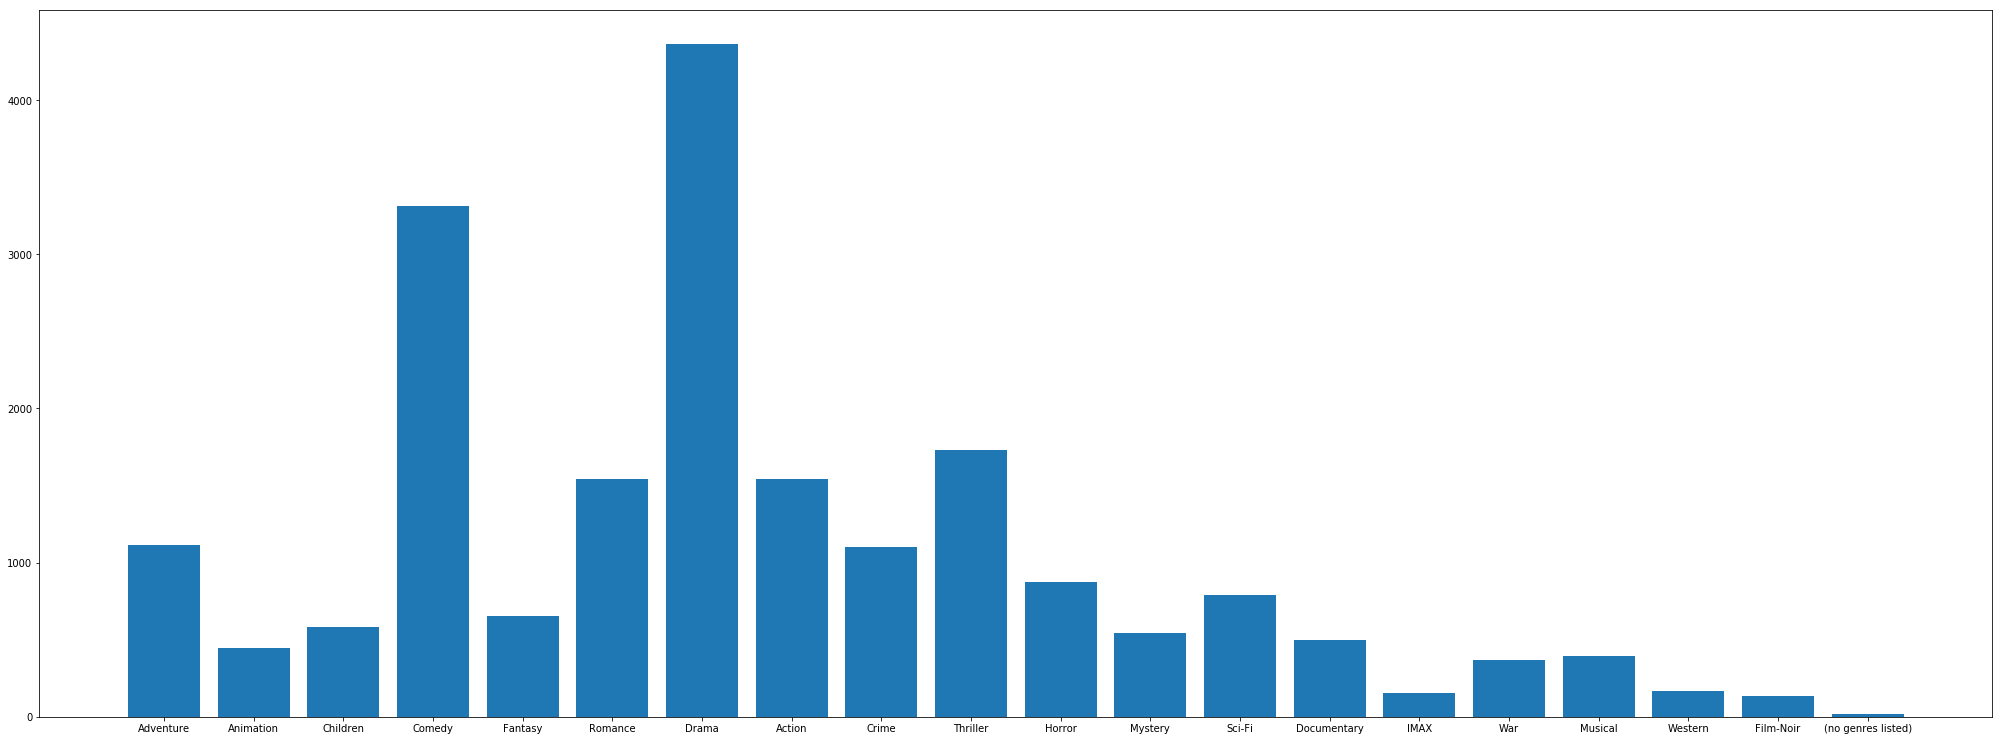

In [4]:
genres = list(numOfMovies.keys())
numOfGanre = np.arange(len(genres))
numOfEachMovieOfGenreType = list(numOfMovies.values())
              
plt.figure(figsize=(35,13))
plt.bar(genres,numOfEachMovieOfGenreType)
plt.xticks(numOfGanre,genres)
plt.show()

### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

Kodo lahko razdelite v več celic.

<Figure size 432x288 with 0 Axes>

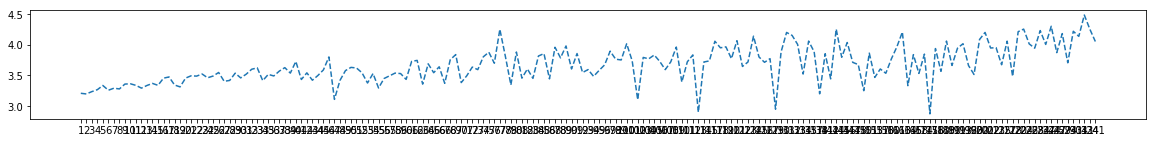

In [5]:
movie_views = {}

for movieId, ratings in movies_ratings.items():
    if len(ratings) not in movie_views:
        movie_views[len(ratings)] = []
    movie_views[len(ratings)].append(movieId)

sorted_movie_views = sorted(movie_views.items(), key=lambda kv: kv[0])

print()

Avg_ratings = {}
for movieId, ratings in movies_ratings.items():
    if len(ratings) == 0:
        Avg_ratings[movieId] = 0
    else:
        Avg_ratings[movieId] = np.mean(ratings)

avg_ratings = {}
for ratingsNum, movieIds in sorted_movie_views:
    avg_ratings_of_each_movie = []
    for movieId in movieIds:
        avg_ratings_of_each_movie.append(np.mean(Avg_ratings[movieId]))
    avg_ratings[ratingsNum] = np.mean(avg_ratings_of_each_movie)
del avg_ratings[0]

plt.figure()
plt.figure(figsize=(20,2))
plt.plot([i for i in range(len(sorted_movie_views))][1:], avg_ratings.values(), '--')
plt.xticks([i for i in range(len(sorted_movie_views))][1:],[ratingsNum for ratingsNum,movieIds in sorted_movie_views][1:])
plt.show()

Odgovor: Naredil sem tako, da sem filme, ki imajo enako število ogledov, spravil skupaj, nato sem naredil povprečje vseh filmov z enakim številom ogledov. Filmi brez ocen so bili izpuščeni.

Na grafu se vidi da več ko ima ogledov boljša je ocena, so pa tudi posebneži.

### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

Kodo lahko razdelite v več celic.

<Figure size 432x288 with 0 Axes>

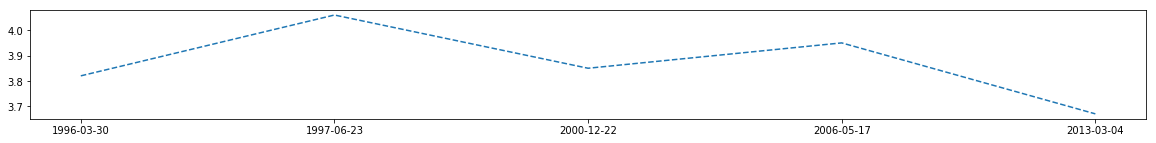

In [6]:
for movieId, ratingsTimes in movieId_time.items():
    movieId_time[movieId] = sorted(ratingsTimes, key= lambda x : x[1])

box = {}
for i,j in movieId_time.items():    
    tmp=0
    st=0
    box[i] = []
    while st < len(j):
        box[i].append(j[st:st+50])
        st+=50

avgBox = {}
for i,j in box.items(): 
    avgBox[i] = []
    for k in j:
        avgBox[i].append([k[0][1],round(np.mean([x for x,y in k]),2)])
        
plt.figure()
plt.figure(figsize=(20,2))
plt.plot([i for i in range(len(avgBox[1]))], [j for i,j in avgBox[1]], '--')
plt.xticks([i for i in range(len(avgBox[1]))],[datetime.fromtimestamp(i).date() for i,j in avgBox[1]])
plt.show()

<Figure size 432x288 with 0 Axes>

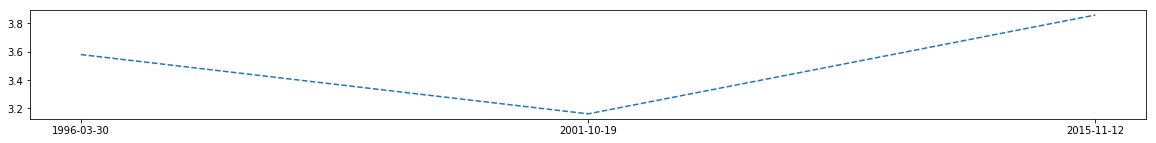

In [7]:
plt.figure()
plt.figure(figsize=(20,2))
plt.plot([i for i in range(len(avgBox[2]))], [j for i,j in avgBox[2]], '--')
plt.xticks([i for i in range(len(avgBox[2]))],[datetime.fromtimestamp(i).date() for i,j in avgBox[2]])
plt.show()

Odgovor: Popularnost se zničuje. To vidimo na grafu kako so datumi zmeraj bolj narazen.

Pri prvem filmu kaže kako popularnost pada, v drugem pa čeprav je vmes popularnost padla, zdaj ponovno raste.

### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

Kodo lahko razdelite v več celic.

In [8]:
cast_movies = {}
for movieId,casts in movies_cast.items():
    for cast in casts:
        if cast not in cast_movies:
            cast_movies[cast]=[]
        cast_movies[cast].append(movieId)

Avg_ratings = {}
for movieId, ratings in movies_ratings.items():
    if len(ratings) == 0:
        continue
    Avg_ratings[movieId] = np.mean(ratings)
    
        
cast_avg_movie_rating = {}
for cast,movieIds in cast_movies.items():
    avg_ratings_of_each_movie = []
    for movieId in movieIds:
        if movieId in Avg_ratings:
            avg_ratings_of_each_movie.append(np.mean(Avg_ratings[movieId]))
    if not avg_ratings_of_each_movie:
        avg_ratings_of_each_movie = 0
    cast_avg_movie_rating[cast] = np.mean(avg_ratings_of_each_movie)
    
sorted_cast_ratings = sorted(cast_avg_movie_rating.items(), key=lambda kv: kv[1], reverse=True)

print("Najbolših 10:\n")
for i in range(10):
    print("{}: {}".format(sorted_cast_ratings[i][0], sorted_cast_ratings[i][1]))
    
    
#-----------------------------------------------------

     
cast_avg_movie_rating = {}
for cast,movieIds in cast_movies.items():
    avg_ratings_of_each_movie = []
    if len(movieIds) < 10:
        continue
    for movieId in movieIds:
        if movieId in Avg_ratings:
            avg_ratings_of_each_movie.append(np.mean(Avg_ratings[movieId]))
    if not avg_ratings_of_each_movie:
        avg_ratings_of_each_movie = 0
    cast_avg_movie_rating[cast] = np.mean(avg_ratings_of_each_movie)
    
sorted_cast_ratings = sorted(cast_avg_movie_rating.items(), key=lambda kv: kv[1], reverse=True)

print("----------------------------------------------\n\n\nNajboljših 10, ki so nastopali v vsaj 10. filmih:\n")
for i in range(10):
    print("{}: {}".format(sorted_cast_ratings[i][0], sorted_cast_ratings[i][1]))

Najbolših 10:

Michele Placido: 5.0
Piro Milkani: 5.0
Elida Janushi: 5.0
Sefer Pema: 5.0
Idajet Sejdia: 5.0
Marieta Ljarja: 5.0
Elina Ndreu: 5.0
Ilir Ara: 5.0
Liliana Subashi: 5.0
Artan Marina: 5.0
----------------------------------------------


Najboljših 10, ki so nastopali v vsaj 10. filmih:

Takashi Shimura: 4.124365465883323
Alec Guinness: 4.035585543142023
Charles Chaplin: 4.031285558150677
George Sanders: 3.9847254004576653
Michel Piccoli: 3.9715277777777778
Buster Keaton: 3.964835164835165
Derek Jacobi: 3.9502920224264098
Cary Grant: 3.9360012382734064
Domhnall Gleeson: 3.934604639782125
Jacqueline Bisset: 3.9244444444444446


Odgovor: Za izračun popularnosti sem najprej pogledal, v katerih filmih igralec nastopa, potem pa izračunal povprečje ocen vseh njegovih filmov.

Ker je enak problem kot pri prvi nalogi, da je igralec igral v premalo filmih, sem določil mejo, da mora igralec nastopati vsaj v desetih filmih

### bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: Najboljši film mi je Avenger (prvi del).
Zelo rad imam akcijske in fantazijske filme, ter se nadaljujeje/povezujeje z ostalimi filmi. Kot da bi dobil en dolg film.

## Zapiski
Za nalaganje podatkov lahko uporabite vgrajen modul `csv`. Mapa s podatki `ml-latest-small` se v tem primeru mora nahajati v isti mapi kot notebook.

In [9]:
from csv import DictReader

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [10]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [11]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'